In [85]:
import pandas as pd
import seaborn as sns 
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder,  OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [86]:
df=pd.read_csv("C:\\Users\\niranjana\\Downloads\\test_lAUu6dG.csv")

In [87]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [88]:
df.tail(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural
366,LP002989,Male,No,0,Graduate,Yes,9200,0,98.0,180.0,1.0,Rural


In [89]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [90]:
df.size

4404

In [91]:
df.shape

(367, 12)

In [92]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

### checking for null values

In [94]:
df.isna()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
362,False,False,False,False,False,False,False,False,False,False,False,False
363,False,False,False,False,False,False,False,False,False,False,False,False
364,False,False,False,False,False,False,False,False,False,False,True,False
365,False,False,False,False,False,False,False,False,False,False,False,False


In [95]:
df.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

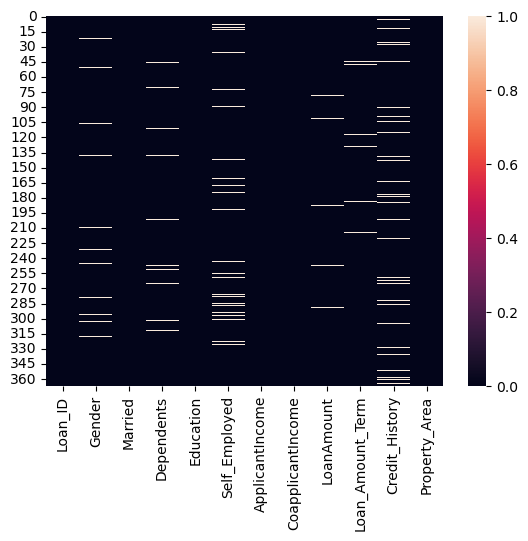

In [96]:
sns.heatmap(df.isna())
plt.show()

### handling null values

#### Spliting df into numerical and categorical

In [99]:
cat_df=df.select_dtypes(include=['object'])

In [100]:
cat_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,Urban
1,LP001022,Male,Yes,1,Graduate,No,Urban
2,LP001031,Male,Yes,2,Graduate,No,Urban
3,LP001035,Male,Yes,2,Graduate,No,Urban
4,LP001051,Male,No,0,Not Graduate,No,Urban
...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,Urban
363,LP002975,Male,Yes,0,Graduate,No,Urban
364,LP002980,Male,No,0,Graduate,No,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,Rural


In [101]:
num_df=df.select_dtypes(include=['int64','float64'])

In [102]:
num_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5720,0,110.0,360.0,1.0
1,3076,1500,126.0,360.0,1.0
2,5000,1800,208.0,360.0,1.0
3,2340,2546,100.0,360.0,NaN
4,3276,0,78.0,360.0,1.0
...,...,...,...,...,...
362,4009,1777,113.0,360.0,1.0
363,4158,709,115.0,360.0,1.0
364,3250,1993,126.0,360.0,NaN
365,5000,2393,158.0,360.0,1.0


In [103]:
num_col=num_df.columns.tolist()
print('numerical columns are:')
num_col

numerical columns are:


['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [104]:
print('categorical columns are:')
cat_col=cat_df.columns.tolist()
cat_col

categorical columns are:


['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [105]:
for col in cat_df:
    cat_df[col]=cat_df[col].fillna(cat_df[col].mode()[0])

In [106]:
for col in num_df:
    num_df[col]=num_df[col].fillna(num_df[col].mean())

#### concatenating both df

In [108]:
df=pd.concat([num_df,cat_df], axis=1)

In [109]:
df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,5720,0,110.0,360.0,1.000000,LP001015,Male,Yes,0,Graduate,No,Urban
1,3076,1500,126.0,360.0,1.000000,LP001022,Male,Yes,1,Graduate,No,Urban
2,5000,1800,208.0,360.0,1.000000,LP001031,Male,Yes,2,Graduate,No,Urban
3,2340,2546,100.0,360.0,0.825444,LP001035,Male,Yes,2,Graduate,No,Urban
4,3276,0,78.0,360.0,1.000000,LP001051,Male,No,0,Not Graduate,No,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,4009,1777,113.0,360.0,1.000000,LP002971,Male,Yes,3+,Not Graduate,Yes,Urban
363,4158,709,115.0,360.0,1.000000,LP002975,Male,Yes,0,Graduate,No,Urban
364,3250,1993,126.0,360.0,0.825444,LP002980,Male,No,0,Graduate,No,Semiurban
365,5000,2393,158.0,360.0,1.000000,LP002986,Male,Yes,0,Graduate,No,Rural


In [110]:
df.isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Property_Area        0
dtype: int64

### checking for duplicated values

In [112]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
362    False
363    False
364    False
365    False
366    False
Length: 367, dtype: bool

In [113]:
df.duplicated().sum()

0

In [114]:
df.columns.duplicated().sum()

0

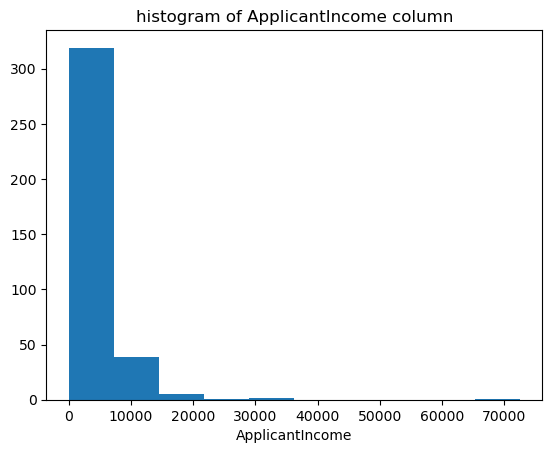

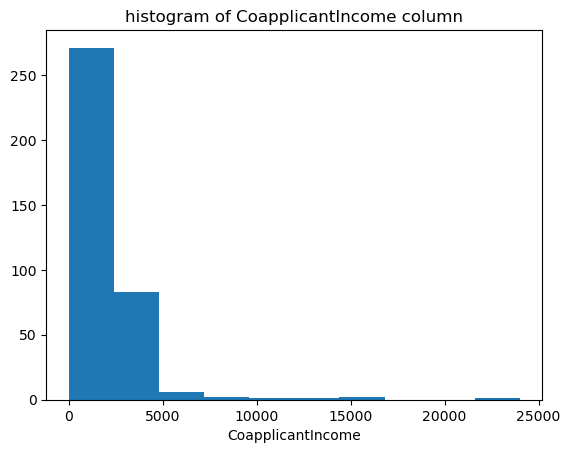

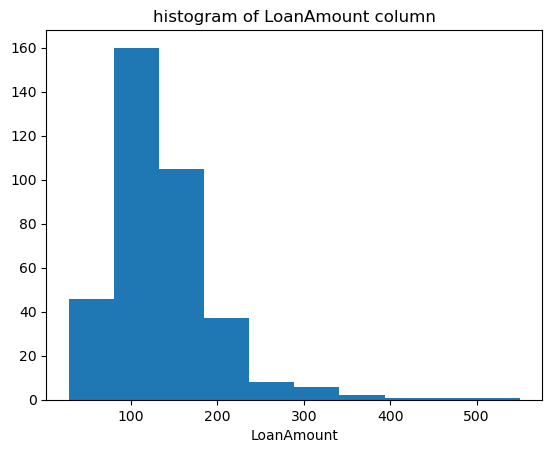

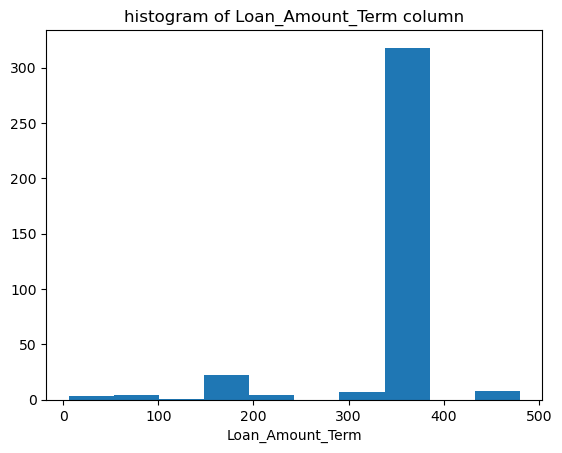

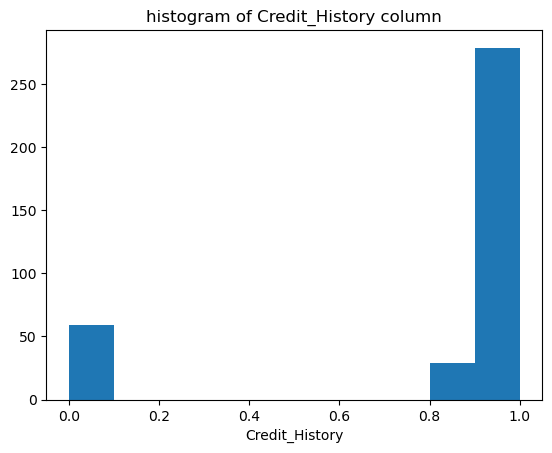

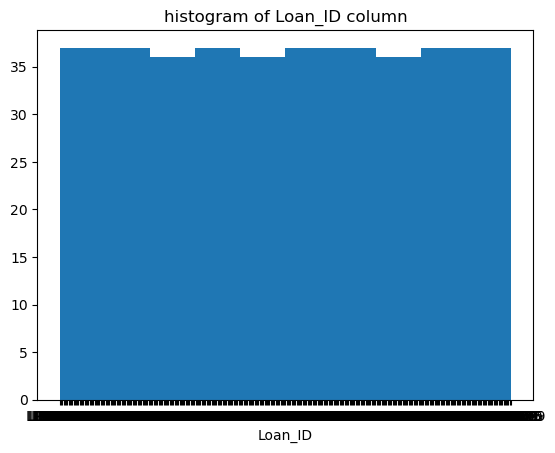

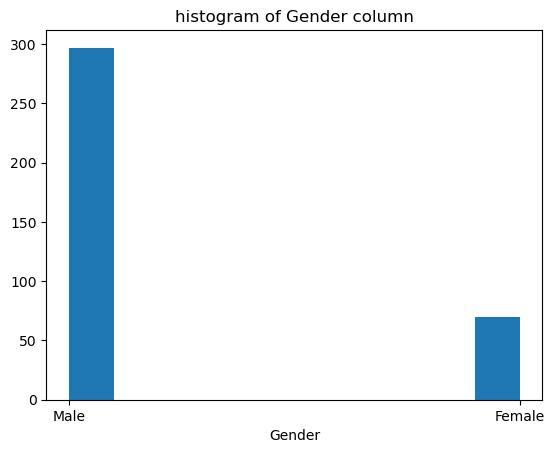

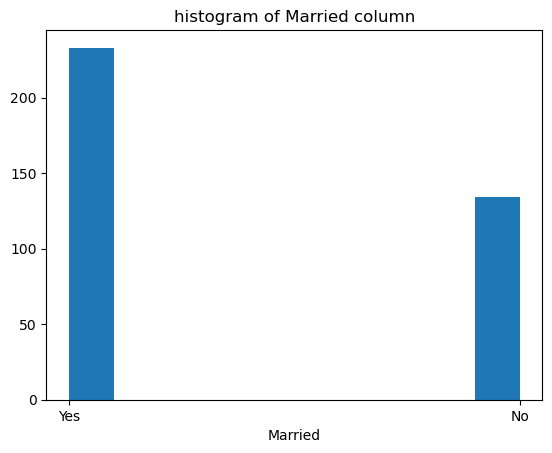

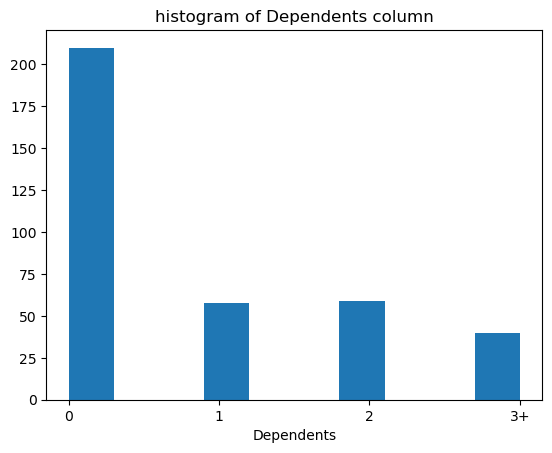

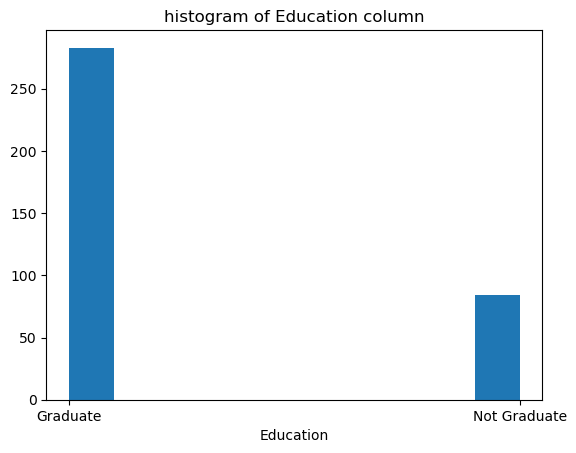

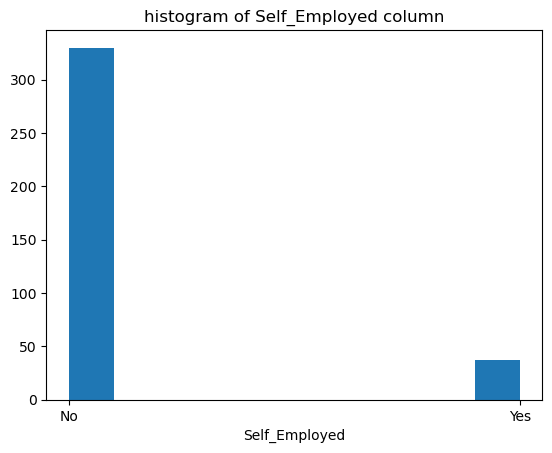

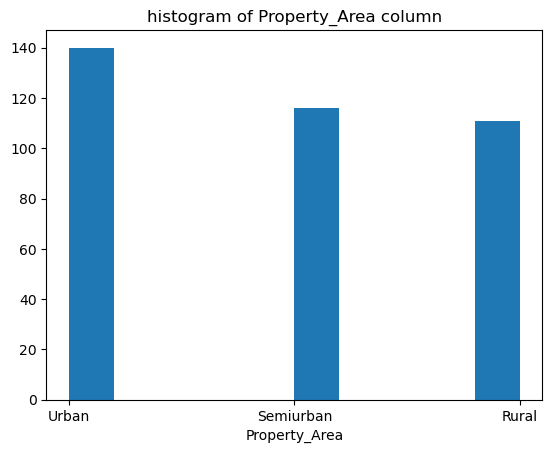

In [115]:
for column_name in df:
    plt.hist(df[column_name])
    plt.title("histogram of {} column".format(column_name))
    plt.xlabel(column_name)
    plt.show()

### Encoding nominal columns

In [117]:
cat_df=pd.get_dummies(cat_df,columns=['Married'], prefix='Married', dtype='int', drop_first=True)

In [118]:
cat_df

,Loan_ID,Gender,Dependents,Education,Self_Employed,Property_Area,Married_Yes
0,LP001015,Male,0,Graduate,No,Urban,1
1,LP001022,Male,1,Graduate,No,Urban,1
2,LP001031,Male,2,Graduate,No,Urban,1
3,LP001035,Male,2,Graduate,No,Urban,1
4,LP001051,Male,0,Not Graduate,No,Urban,0
...,...,...,...,...,...,...,...
362,LP002971,Male,3+,Not Graduate,Yes,Urban,1
363,LP002975,Male,0,Graduate,No,Urban,1
364,LP002980,Male,0,Graduate,No,Semiurban,0
365,LP002986,Male,0,Graduate,No,Rural,1


In [119]:
cat_df=pd.get_dummies(cat_df,columns=['Self_Employed'], prefix='self_employed', dtype='int', drop_first=True)

In [120]:
cat_df

,Loan_ID,Gender,Dependents,Education,Property_Area,Married_Yes,self_employed_Yes
0,LP001015,Male,0,Graduate,Urban,1,0
1,LP001022,Male,1,Graduate,Urban,1,0
2,LP001031,Male,2,Graduate,Urban,1,0
3,LP001035,Male,2,Graduate,Urban,1,0
4,LP001051,Male,0,Not Graduate,Urban,0,0
...,...,...,...,...,...,...,...
362,LP002971,Male,3+,Not Graduate,Urban,1,1
363,LP002975,Male,0,Graduate,Urban,1,0
364,LP002980,Male,0,Graduate,Semiurban,0,0
365,LP002986,Male,0,Graduate,Rural,1,0


### Encoding other columns

#### Using ordinal encoding:

In [123]:
cat_df=pd.get_dummies(cat_df,columns=['Education'], prefix='education', dtype='int', drop_first=True)

In [124]:
cat_df=pd.get_dummies(cat_df,columns=['Property_Area'], prefix='property_area', dtype='int', drop_first=True)

In [125]:
cat_df=pd.get_dummies(cat_df,columns=['Dependents'], prefix='dependents', dtype='int', drop_first=True)

In [126]:
cat_df=pd.get_dummies(cat_df,columns=['Gender'], prefix='gender', dtype='int', drop_first=True)

In [127]:
# unique_values = cat_df['Self_Employed'].unique()
# print(unique_values)

In [128]:
#cat_df=pd.get_dummies(cat_df,columns=['Self_Employed'], prefix='col', dtype='int', drop_first=True)

In [129]:
label_enc=LabelEncoder()
cat_df['Loan_ID']=label_enc.fit_transform(df['Loan_ID'])

In [130]:
cat_df

,Loan_ID,Married_Yes,self_employed_Yes,education_Not Graduate,property_area_Semiurban,property_area_Urban,dependents_1,dependents_2,dependents_3+,gender_Male
0,0,1,0,0,0,1,0,0,0,1
1,1,1,0,0,0,1,1,0,0,1
2,2,1,0,0,0,1,0,1,0,1
3,3,1,0,0,0,1,0,1,0,1
4,4,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
362,362,1,1,1,0,1,0,0,1,1
363,363,1,0,0,0,1,0,0,0,1
364,364,0,0,0,1,0,0,0,0,1
365,365,1,0,0,0,0,0,0,0,1


#### Therefore all the categorical columns are encoded to numerical.

In [132]:
#concatinating both 

In [133]:
df=pd.concat([num_df,cat_df], axis=1)

In [134]:
df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Married_Yes,self_employed_Yes,education_Not Graduate,property_area_Semiurban,property_area_Urban,dependents_1,dependents_2,dependents_3+,gender_Male
0,5720,0,110.0,360.0,1.000000,0,1,0,0,0,1,0,0,0,1
1,3076,1500,126.0,360.0,1.000000,1,1,0,0,0,1,1,0,0,1
2,5000,1800,208.0,360.0,1.000000,2,1,0,0,0,1,0,1,0,1
3,2340,2546,100.0,360.0,0.825444,3,1,0,0,0,1,0,1,0,1
4,3276,0,78.0,360.0,1.000000,4,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,4009,1777,113.0,360.0,1.000000,362,1,1,1,0,1,0,0,1,1
363,4158,709,115.0,360.0,1.000000,363,1,0,0,0,1,0,0,0,1
364,3250,1993,126.0,360.0,0.825444,364,0,0,0,1,0,0,0,0,1
365,5000,2393,158.0,360.0,1.000000,365,1,0,0,0,0,0,0,0,1


### plot to analyse the distribution:

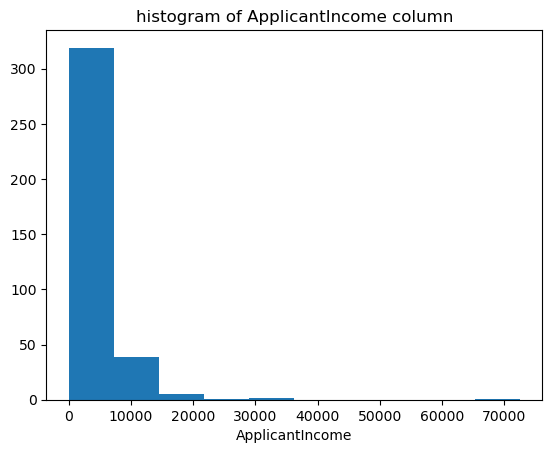

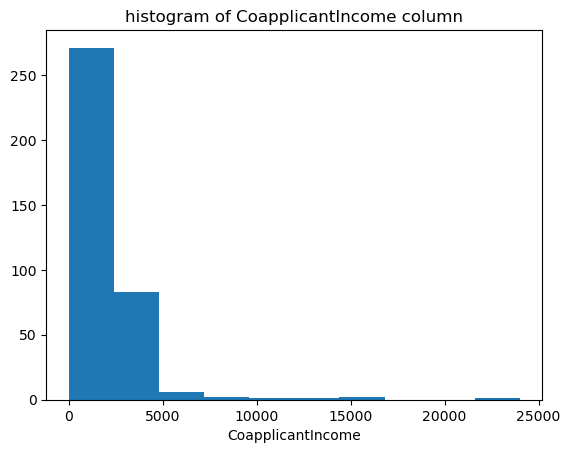

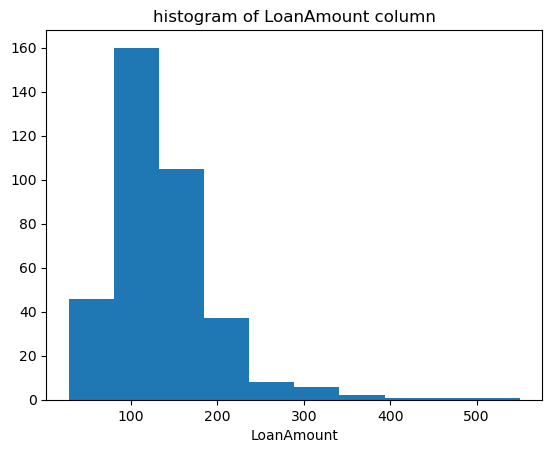

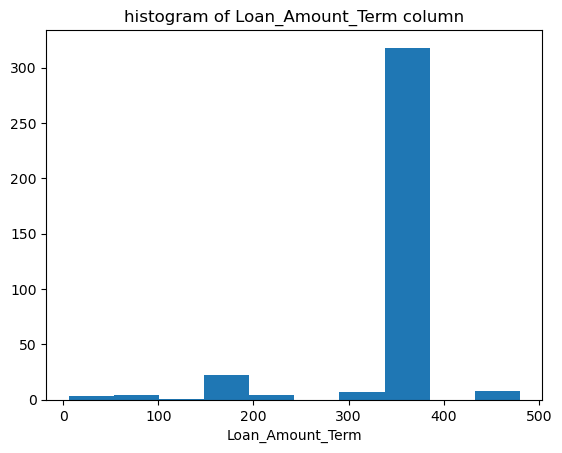

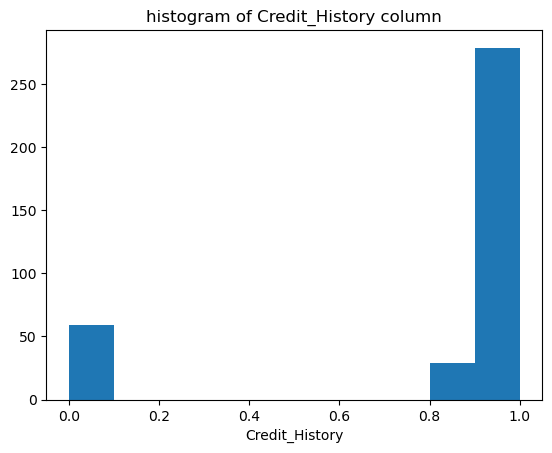

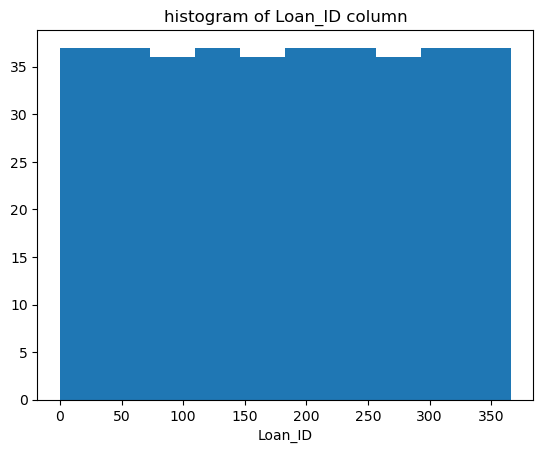

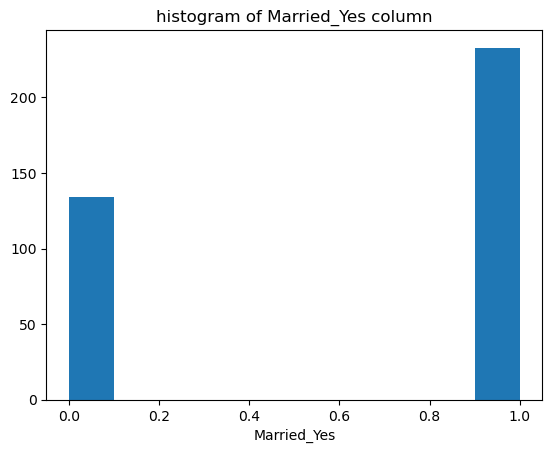

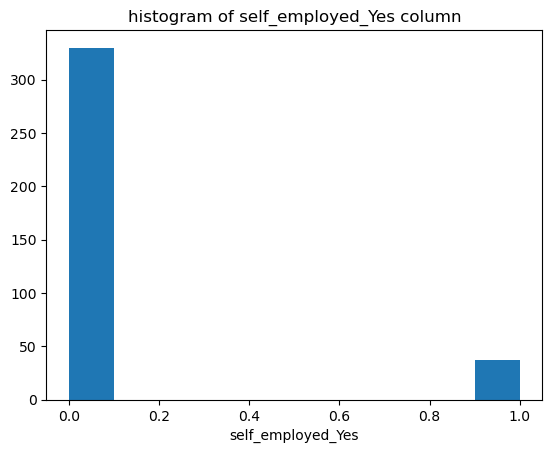

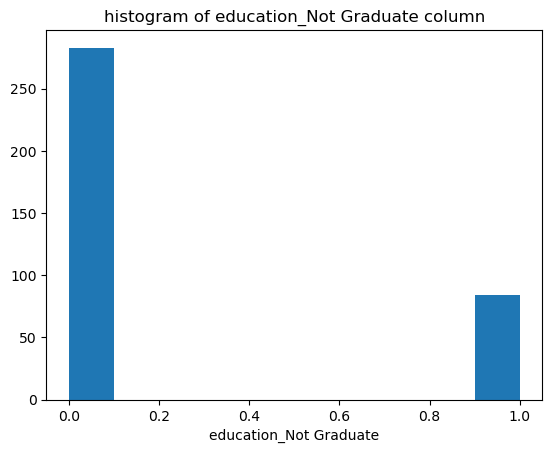

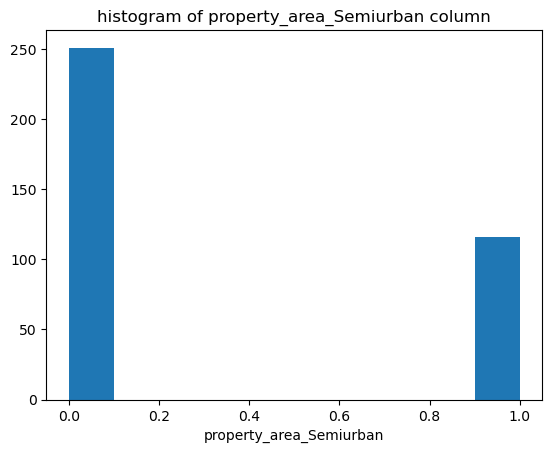

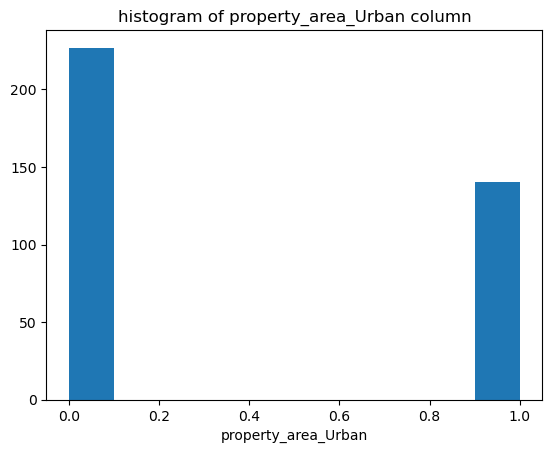

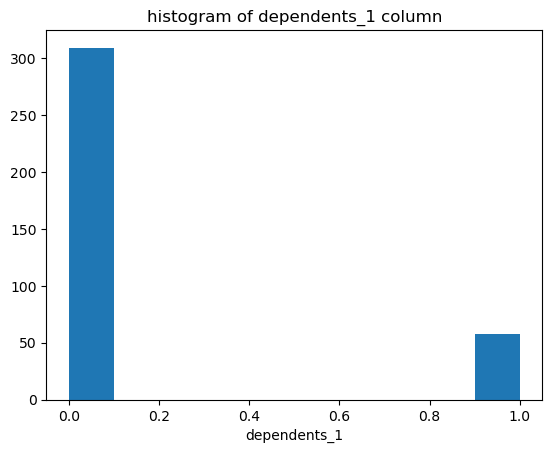

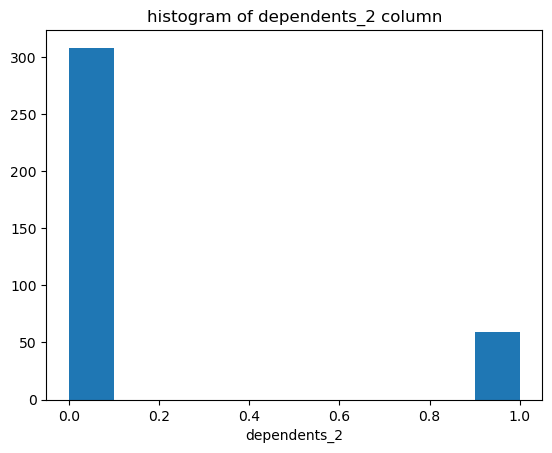

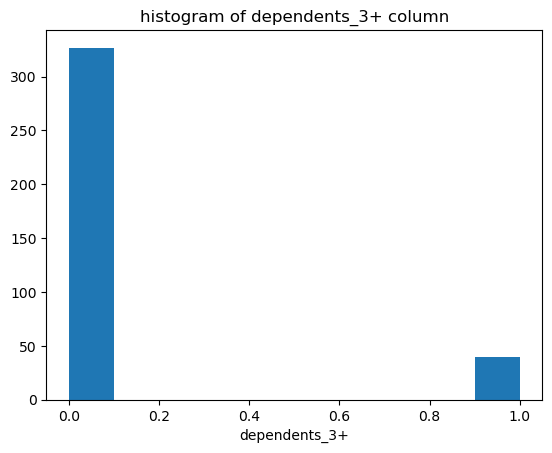

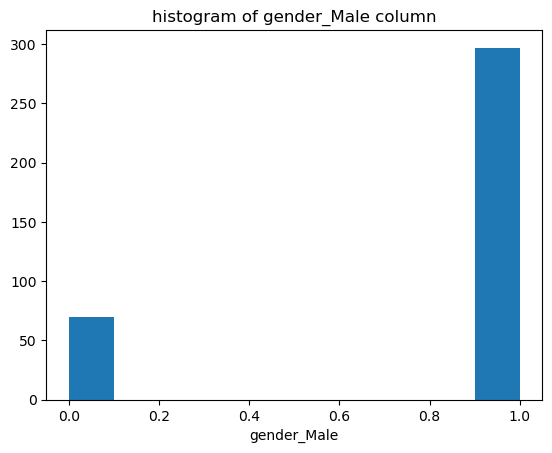

In [136]:
for column_name in df:
    plt.hist(df[column_name])
    plt.title("histogram of {} column".format(column_name))
    plt.xlabel(column_name)
    plt.show()

### Scaling 

In [138]:
std_scaler= StandardScaler()
min_max = MinMaxScaler()

In [139]:
df.columns.tolist()

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Loan_ID',
 'Married_Yes',
 'self_employed_Yes',
 'education_Not Graduate',
 'property_area_Semiurban',
 'property_area_Urban',
 'dependents_1',
 'dependents_2',
 'dependents_3+',
 'gender_Male']

In [140]:
std_cols = ['LoanAmount']
df[std_cols]= std_scaler.fit_transform(df[std_cols])
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Married_Yes,self_employed_Yes,education_Not Graduate,property_area_Semiurban,property_area_Urban,dependents_1,dependents_2,dependents_3+,gender_Male
0,5720,0,-0.429368,360.0,1.000000,0,1,0,0,0,1,0,0,0,1
1,3076,1500,-0.166482,360.0,1.000000,1,1,0,0,0,1,1,0,0,1
2,5000,1800,1.180807,360.0,1.000000,2,1,0,0,0,1,0,1,0,1
3,2340,2546,-0.593671,360.0,0.825444,3,1,0,0,0,1,0,1,0,1
4,3276,0,-0.955139,360.0,1.000000,4,0,0,1,0,1,0,0,0,1


# Handling Outlier

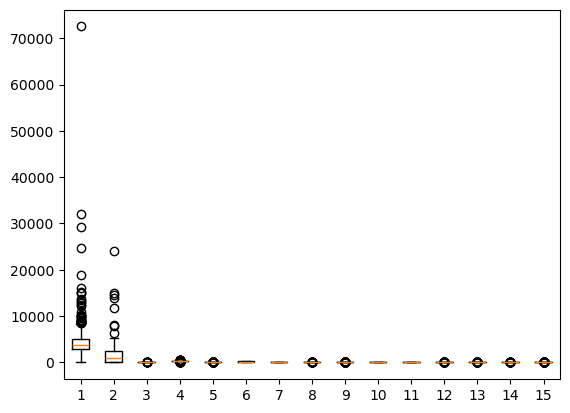

In [142]:
plt.boxplot(df)
plt.show()

In [143]:
def remove_outliers (df,column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    IQR = q3 - q1
    upper_bound = q3 + 1.5 * IQR
    lower_bound = q1 - 1.5 * IQR
    df[column_name] =   df[column_name].clip(upper = upper_bound)
    df[column_name] =   df[column_name].clip(lower = lower_bound)
    return df[column_name]

In [144]:
for col in df:
    df[col] = remove_outliers(df,col)

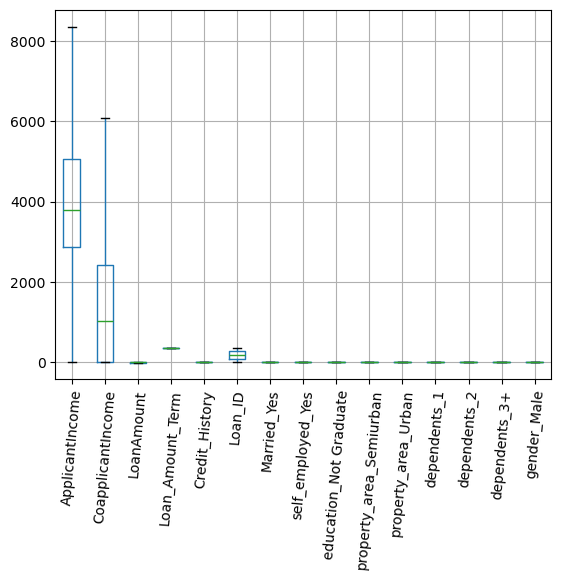

In [145]:
df.boxplot()
plt.xticks(rotation = 85)
plt.show()

# correlation matrix

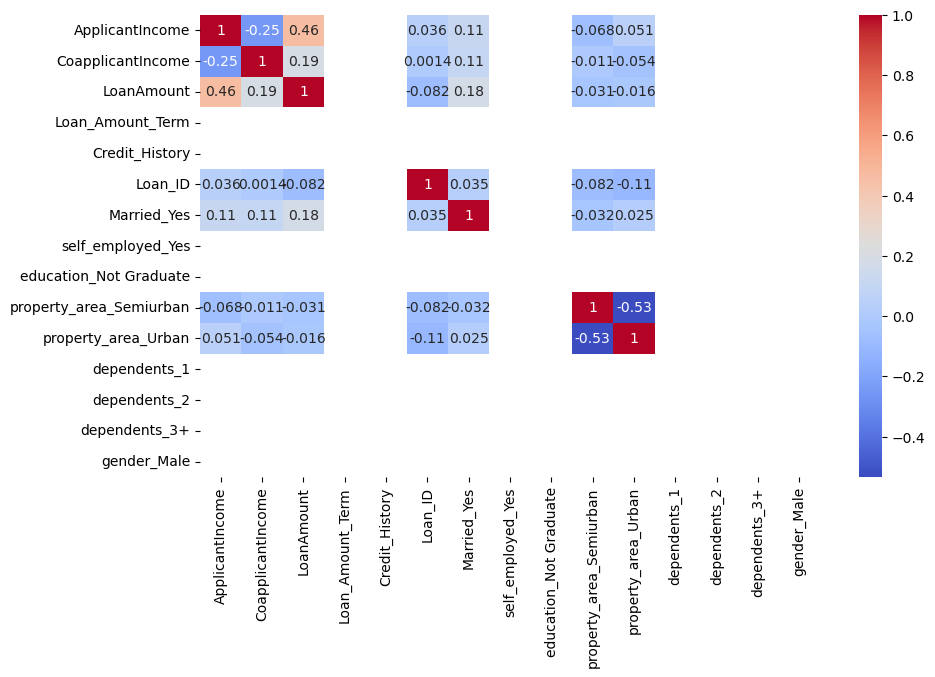

In [147]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot =True, cmap = 'coolwarm')
plt.show()

In [148]:
df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Married_Yes,self_employed_Yes,education_Not Graduate,property_area_Semiurban,property_area_Urban,dependents_1,dependents_2,dependents_3+,gender_Male
0,5720,0.0,-0.429368,360.0,1.0,0,1,0,0,0,1,0,0,0,1
1,3076,1500.0,-0.166482,360.0,1.0,1,1,0,0,0,1,0,0,0,1
2,5000,1800.0,1.180807,360.0,1.0,2,1,0,0,0,1,0,0,0,1
3,2340,2546.0,-0.593671,360.0,1.0,3,1,0,0,0,1,0,0,0,1
4,3276,0.0,-0.955139,360.0,1.0,4,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,4009,1777.0,-0.380077,360.0,1.0,362,1,0,0,0,1,0,0,0,1
363,4158,709.0,-0.347216,360.0,1.0,363,1,0,0,0,1,0,0,0,1
364,3250,1993.0,-0.166482,360.0,1.0,364,0,0,0,1,0,0,0,0,1
365,5000,2393.0,0.359289,360.0,1.0,365,1,0,0,0,0,0,0,0,1


In [149]:
df2=pd.read_csv("C:\\Users\\niranjana\\Downloads\\train_ctrUa4K.csv")

In [150]:
df2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [151]:
df2.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [152]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [153]:
df2.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [154]:
df2.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

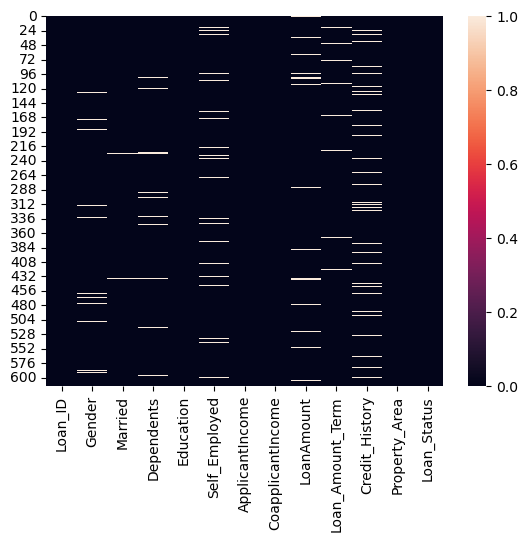

In [155]:
sns.heatmap(df2.isna())
plt.show()

## handling null values

#### Spliting categorical and numerical column

In [158]:
cat_df2=df2.select_dtypes(include=['object'])
num_df2=df2.select_dtypes(include=['int64','float64'])

In [159]:
cat_df2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [160]:
num_df2

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


In [161]:
for col in cat_df2:
    cat_df2[col]=cat_df2[col].fillna(cat_df2[col].mode()[0])

In [162]:
for col in num_df2:
    num_df2[col]=num_df2[col].fillna(num_df2[col].mean())

In [163]:
df2=pd.concat([num_df2,cat_df2], axis=1)

In [164]:
df2.isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Property_Area        0
Loan_Status          0
dtype: int64

## Checking for dulication

In [166]:
df2.duplicated().sum()

0

In [167]:
df2.columns.duplicated().sum()

0

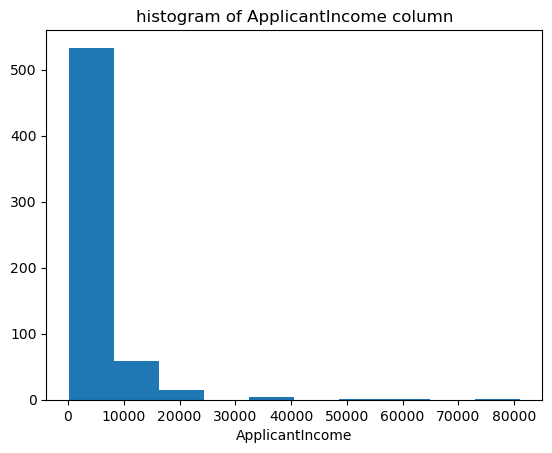

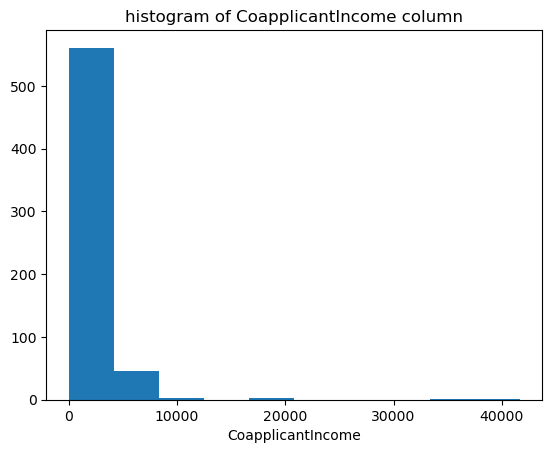

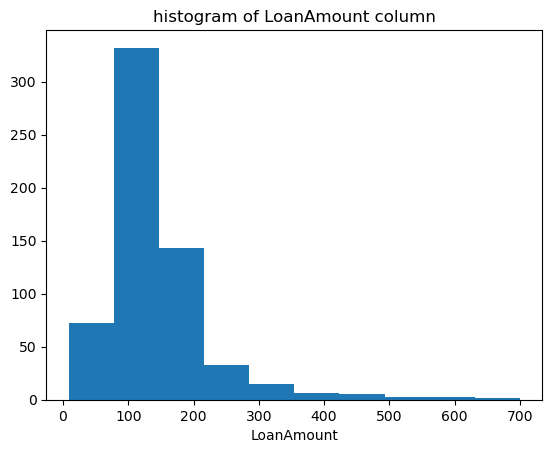

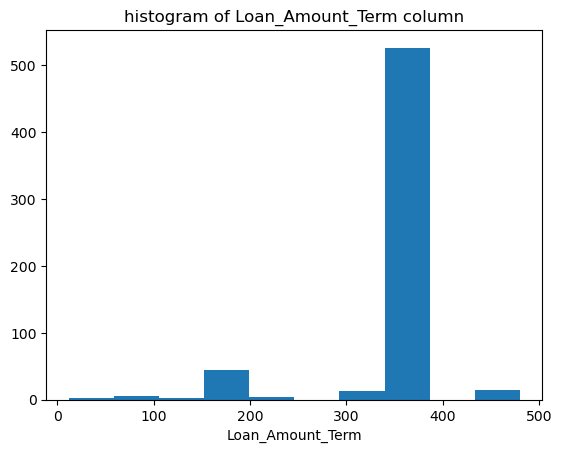

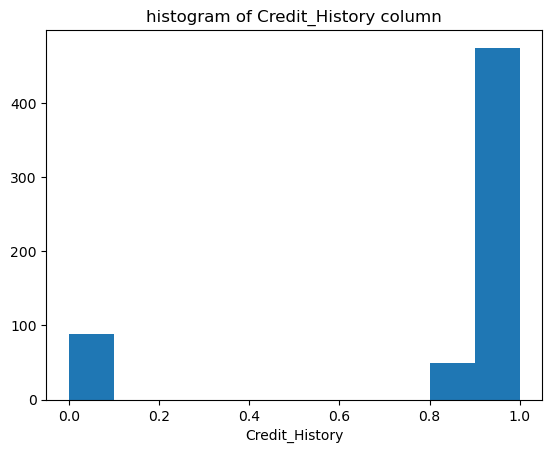

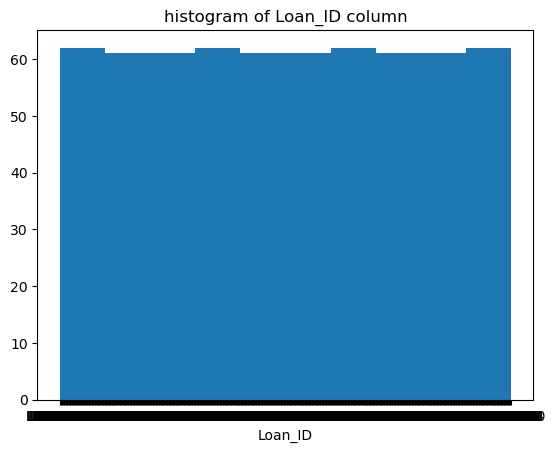

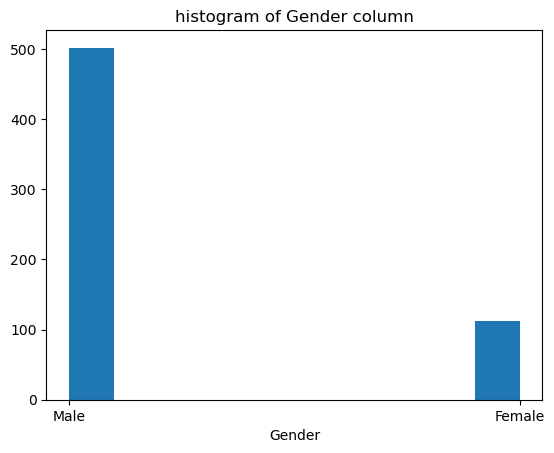

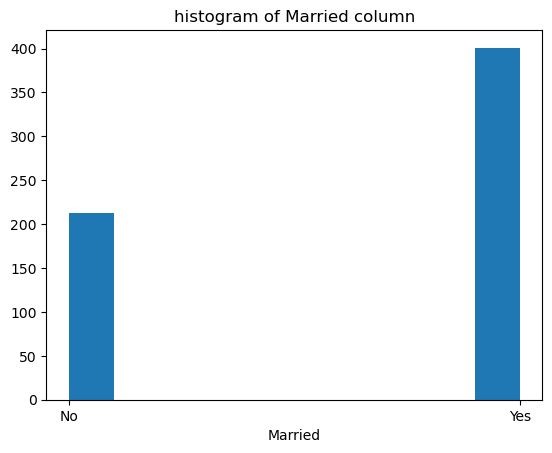

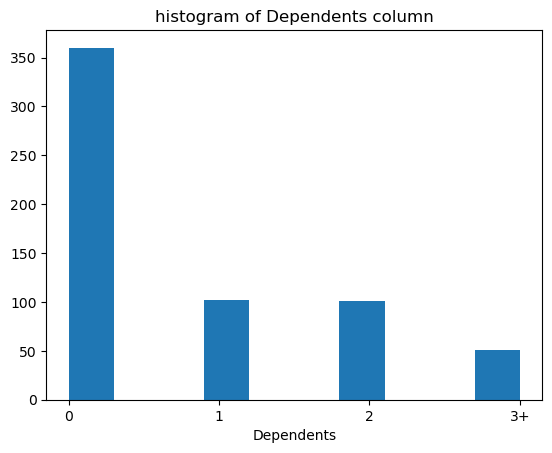

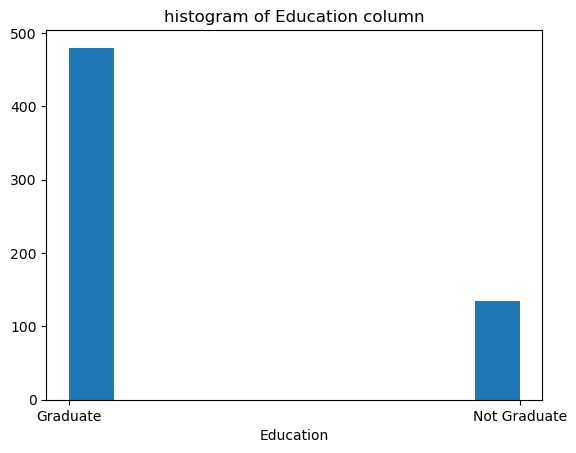

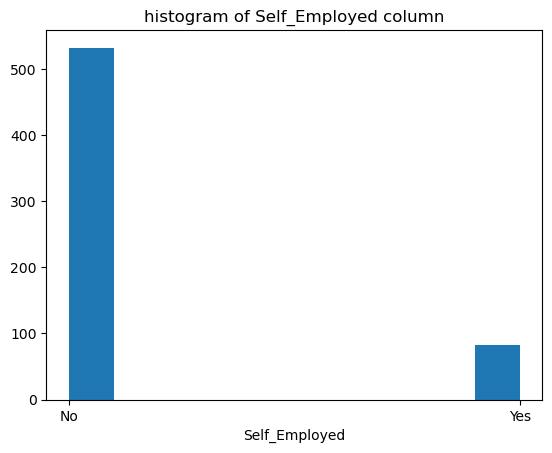

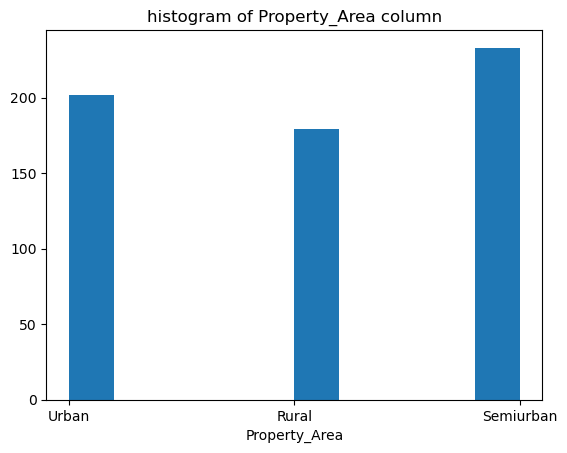

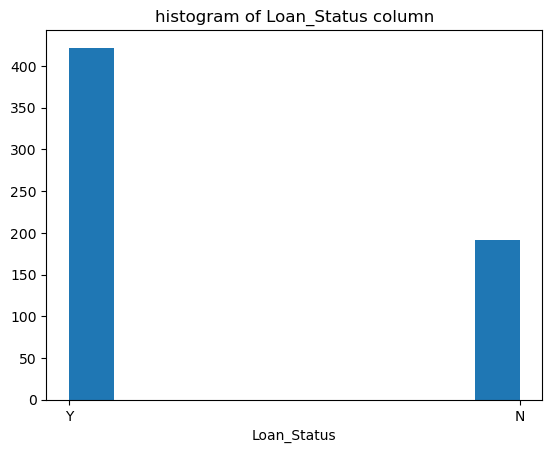

In [168]:
for column_name in df2:
    plt.hist(df2[column_name])
    plt.title("histogram of {} column".format(column_name))
    plt.xlabel(column_name)
    plt.show()

## Encoding

In [170]:
cat_df2=pd.get_dummies(cat_df2,columns=['Married'], prefix='Married', dtype='int', drop_first=True)

In [171]:
cat_df2

,Loan_ID,Gender,Dependents,Education,Self_Employed,Property_Area,Loan_Status,Married_Yes
0,LP001002,Male,0,Graduate,No,Urban,Y,0
1,LP001003,Male,1,Graduate,No,Rural,N,1
2,LP001005,Male,0,Graduate,Yes,Urban,Y,1
3,LP001006,Male,0,Not Graduate,No,Urban,Y,1
4,LP001008,Male,0,Graduate,No,Urban,Y,0
...,...,...,...,...,...,...,...,...
609,LP002978,Female,0,Graduate,No,Rural,Y,0
610,LP002979,Male,3+,Graduate,No,Rural,Y,1
611,LP002983,Male,1,Graduate,No,Urban,Y,1
612,LP002984,Male,2,Graduate,No,Urban,Y,1


In [172]:
cat_df2=pd.get_dummies(cat_df2,columns=['Self_Employed'], prefix='self_employed', dtype='int', drop_first=True)

In [173]:
cat_df2

,Loan_ID,Gender,Dependents,Education,Property_Area,Loan_Status,Married_Yes,self_employed_Yes
0,LP001002,Male,0,Graduate,Urban,Y,0,0
1,LP001003,Male,1,Graduate,Rural,N,1,0
2,LP001005,Male,0,Graduate,Urban,Y,1,1
3,LP001006,Male,0,Not Graduate,Urban,Y,1,0
4,LP001008,Male,0,Graduate,Urban,Y,0,0
...,...,...,...,...,...,...,...,...
609,LP002978,Female,0,Graduate,Rural,Y,0,0
610,LP002979,Male,3+,Graduate,Rural,Y,1,0
611,LP002983,Male,1,Graduate,Urban,Y,1,0
612,LP002984,Male,2,Graduate,Urban,Y,1,0


In [174]:
cat_df2=pd.get_dummies(cat_df2,columns=['Education'], prefix='education', dtype='int', drop_first=True)

In [175]:
cat_df2=pd.get_dummies(cat_df2,columns=['Property_Area'], prefix='property_area', dtype='int', drop_first=True)

In [176]:
cat_df2=pd.get_dummies(cat_df2,columns=['Dependents'], prefix='dependents', dtype='int', drop_first=True)

In [177]:
cat_df2=pd.get_dummies(cat_df2,columns=['Gender'], prefix='gender', dtype='int', drop_first=True)

In [178]:
cat_df2['Loan_Status'] = cat_df2['Loan_Status'].map({'N' : 0, 'Y' : 1})

In [179]:
cat_df2

,Loan_ID,Loan_Status,Married_Yes,self_employed_Yes,education_Not Graduate,property_area_Semiurban,property_area_Urban,dependents_1,dependents_2,dependents_3+,gender_Male
0,LP001002,1,0,0,0,0,1,0,0,0,1
1,LP001003,0,1,0,0,0,0,1,0,0,1
2,LP001005,1,1,1,0,0,1,0,0,0,1
3,LP001006,1,1,0,1,0,1,0,0,0,1
4,LP001008,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,0,0,0,0,0,0,0,0
610,LP002979,1,1,0,0,0,0,0,0,1,1
611,LP002983,1,1,0,0,0,1,1,0,0,1
612,LP002984,1,1,0,0,0,1,0,1,0,1


In [180]:
df2=pd.concat([num_df2,cat_df2],axis=1)

In [181]:
df2

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Loan_Status,Married_Yes,self_employed_Yes,education_Not Graduate,property_area_Semiurban,property_area_Urban,dependents_1,dependents_2,dependents_3+,gender_Male
0,5849,0.0,146.412162,360.0,1.0,LP001002,1,0,0,0,0,1,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,LP001003,0,1,0,0,0,0,1,0,0,1
2,3000,0.0,66.000000,360.0,1.0,LP001005,1,1,1,0,0,1,0,0,0,1
3,2583,2358.0,120.000000,360.0,1.0,LP001006,1,1,0,1,0,1,0,0,0,1
4,6000,0.0,141.000000,360.0,1.0,LP001008,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,LP002978,1,0,0,0,0,0,0,0,0,0
610,4106,0.0,40.000000,180.0,1.0,LP002979,1,1,0,0,0,0,0,0,1,1
611,8072,240.0,253.000000,360.0,1.0,LP002983,1,1,0,0,0,1,1,0,0,1
612,7583,0.0,187.000000,360.0,1.0,LP002984,1,1,0,0,0,1,0,1,0,1


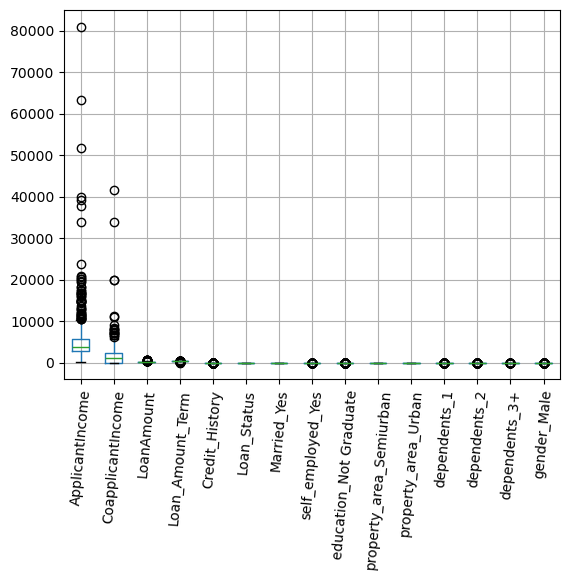

In [182]:
df2.boxplot()
plt.xticks(rotation = 85)
plt.show()

In [183]:
def remove_outliers (df2,column_name):
    q1 = df2[column_name].quantile(0.25)
    q3 = df2[column_name].quantile(0.75)
    IQR = q3 - q1
    upper_bound = q3 + 1.5 * IQR
    lower_bound = q1 - 1.5 * IQR
    df2[column_name] =   df2[column_name].clip(upper = upper_bound)
    df2[column_name] =   df2[column_name].clip(lower = lower_bound)
    return df2[column_name]

In [184]:
for col in num_df2:
    num_df2[col] = remove_outliers(num_df2,col)

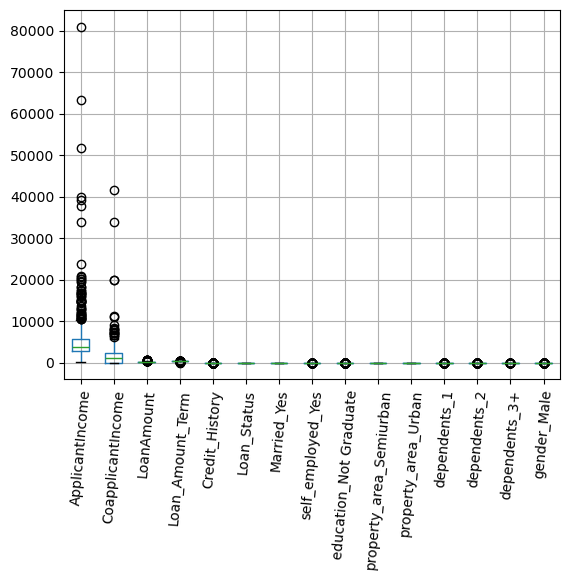

In [185]:
df2.boxplot()
plt.xticks(rotation = 85)
plt.show()

In [186]:
scaler = StandardScaler()

In [187]:
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [188]:
for col in numerical_cols:
    df2[col] = scaler.fit_transform(df2[col].values.reshape(-1, 1))
    df[col] = scaler.transform(df[col].values.reshape(-1, 1))

In [189]:
df2= df2.drop('Loan_ID',axis=1)

In [190]:
df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Married_Yes,self_employed_Yes,education_Not Graduate,property_area_Semiurban,property_area_Urban,dependents_1,dependents_2,dependents_3+,gender_Male
0,0.051857,-0.554487,-1.748759,0.279851,1.0,0,1,0,0,0,1,0,0,0,1
1,-0.381297,-0.041468,-1.745628,0.279851,1.0,1,1,0,0,0,1,0,0,0,1
2,-0.066097,0.061136,-1.729583,0.279851,1.0,2,1,0,0,0,1,0,0,0,1
3,-0.501872,0.316278,-1.750715,0.279851,1.0,3,1,0,0,0,1,0,0,0,1
4,-0.348532,-0.554487,-1.755020,0.279851,1.0,4,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,-0.228448,0.053270,-1.748172,0.279851,1.0,362,1,0,0,0,1,0,0,0,1
363,-0.204038,-0.312000,-1.747780,0.279851,1.0,363,1,0,0,0,1,0,0,0,1
364,-0.352791,0.127145,-1.745628,0.279851,1.0,364,0,0,0,1,0,0,0,0,1
365,-0.066097,0.263950,-1.739366,0.279851,1.0,365,1,0,0,0,0,0,0,0,1


In [191]:
df = df.drop(['dependents_1','dependents_2','dependents_3+','gender_Male', 'self_employed_Yes'], axis=1)

In [192]:
df2 = df2.drop(['dependents_1','dependents_2','dependents_3+','gender_Male', 'self_employed_Yes'], axis=1)

In [193]:
from sklearn.model_selection import train_test_split

In [194]:
x = df2.drop(['Loan_Status'],axis=1)
y = df2['Loan_Status']

In [195]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [196]:
print(f"y_test shape: {y_test.shape}")

y_test shape: (123,)


In [197]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [198]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train) 
y_pred = knn.predict(x_test)

In [199]:
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (614, 9)
Shape of y: (614,)


In [200]:
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of x_train: (491, 9)
Shape of y_train: (491,)


In [201]:
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_test: (123, 9)
Shape of y_test: (123,)


In [202]:
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7154471544715447


In [203]:
y_pred.shape

(123,)

In [204]:
from sklearn.naive_bayes import GaussianNB
bc = GaussianNB()
bc.fit(x_train,y_train)

GaussianNB()

In [205]:
pred1 = bc.predict(x_test)

In [206]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score

In [207]:
pred1.shape


(123,)

In [208]:
print('Accuracy:',accuracy_score(pred1,y_test))
print('Precision:',precision_score(pred1,y_test,average='weighted'))
print('Recall:',recall_score(pred1,y_test,average='weighted'))
print('F1 Score:',f1_score(pred1,y_test,average='weighted'))

Accuracy: 0.7804878048780488
Precision: 0.8642306203281812
Recall: 0.7804878048780488
F1 Score: 0.8046812997813654


In [209]:
from sklearn.linear_model import LogisticRegression 

In [210]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [211]:
pred2 = model.predict(x_test)
accuracy_score(y_test,pred2)

0.7642276422764228

In [212]:
from sklearn.ensemble import RandomForestClassifier

RFC =RandomForestClassifier()

In [213]:
RFC.fit(x_train,y_train)

RandomForestClassifier()

In [214]:
pred3 = RFC.predict(x_test)
Rfc_acc = accuracy_score(y_test,pred3)
Rfc_acc

0.7642276422764228

### USING TEST FILE FOR PREDICTION

In [216]:
df = df.drop('Loan_ID',axis=1)

In [217]:
X_train=x
Y_train=y
X_test=df

In [218]:
X_train

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Married_Yes,education_Not Graduate,property_area_Semiurban,property_area_Urban
0,0.072991,-0.554487,0.000000,0.279851,1.0,0,0,0,1
1,-0.134412,-0.038732,-0.219273,0.279851,1.0,1,0,0,0
2,-0.393747,-0.554487,-0.957641,0.279851,1.0,1,0,0,1
3,-0.462062,0.251980,-0.314547,0.279851,1.0,1,1,0,1
4,0.097728,-0.554487,-0.064454,0.279851,1.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
609,-0.410130,-0.554487,-0.898095,0.279851,1.0,0,0,0,0
610,-0.212557,-0.554487,-1.267279,-2.518655,1.0,1,0,0,0
611,0.437174,-0.472404,1.269371,0.279851,1.0,1,0,0,1
612,0.357064,-0.554487,0.483367,0.279851,1.0,1,0,0,1


In [219]:
df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Married_Yes,education_Not Graduate,property_area_Semiurban,property_area_Urban
0,0.051857,-0.554487,-1.748759,0.279851,1.0,1,0,0,1
1,-0.381297,-0.041468,-1.745628,0.279851,1.0,1,0,0,1
2,-0.066097,0.061136,-1.729583,0.279851,1.0,1,0,0,1
3,-0.501872,0.316278,-1.750715,0.279851,1.0,1,0,0,1
4,-0.348532,-0.554487,-1.755020,0.279851,1.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
362,-0.228448,0.053270,-1.748172,0.279851,1.0,1,0,0,1
363,-0.204038,-0.312000,-1.747780,0.279851,1.0,1,0,0,1
364,-0.352791,0.127145,-1.745628,0.279851,1.0,0,0,1,0
365,-0.066097,0.263950,-1.739366,0.279851,1.0,1,0,0,0


In [220]:
model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [221]:
predict = model.predict(X_test)

In [354]:
test=pd.read_csv("C:\\Users\\niranjana\\Downloads\\test_lAUu6dG.csv")

In [356]:
submission1=pd.read_csv("C:\\Users\\niranjana\\Downloads\\sample_submission_49d68Cx.csv")
submission1['Loan_ID']=test['Loan_ID']
submission1['Loan_Status']=predict

In [360]:
submission1['Loan_Status'].replace(0, 'N', inplace=True)
submission1['Loan_Status'].replace(1, 'Y', inplace=True)

C:\Users\niranjana\AppData\Local\Temp\ipykernel_44608\510642647.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  submission1['Loan_Status'].replace(0, 'N', inplace=True)
C:\Users\niranjana\AppData\Local\Temp\ipykernel_44608\510642647.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [362]:
submission1.to_csv("C:\\Users\\niranjana\\Downloads\\submission1.csv", index=False)